Original Data:
          Perplexity  BLEU  ROUGE  Inference Time  Model Size
GPT-3.5        15.3    85     92            0.08       175.0
GPT-2          30.1    50     65            0.12         1.5
T5             20.5    70     80            0.09        11.0
LLaMA          18.7    78     85            0.07        13.0
BLOOM          25.2    65     72            0.10       176.0

Final Ranking:
          Perplexity  BLEU  ROUGE  Inference Time  Model Size  TOPSIS Score  \
BLOOM          25.2    65     72            0.10       176.0      0.668698   
GPT-2          30.1    50     65            0.12         1.5      0.531205   
GPT-3.5        15.3    85     92            0.08       175.0      0.480012   
T5             20.5    70     80            0.09        11.0      0.333709   
LLaMA          18.7    78     85            0.07        13.0      0.305835   

         Rank  
BLOOM     1.0  
GPT-2     2.0  
GPT-3.5   3.0  
T5        4.0  
LLaMA     5.0  


<ipython-input-1-ae13cdfc259e>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted.index, y=df_sorted["TOPSIS Score"], palette="coolwarm")


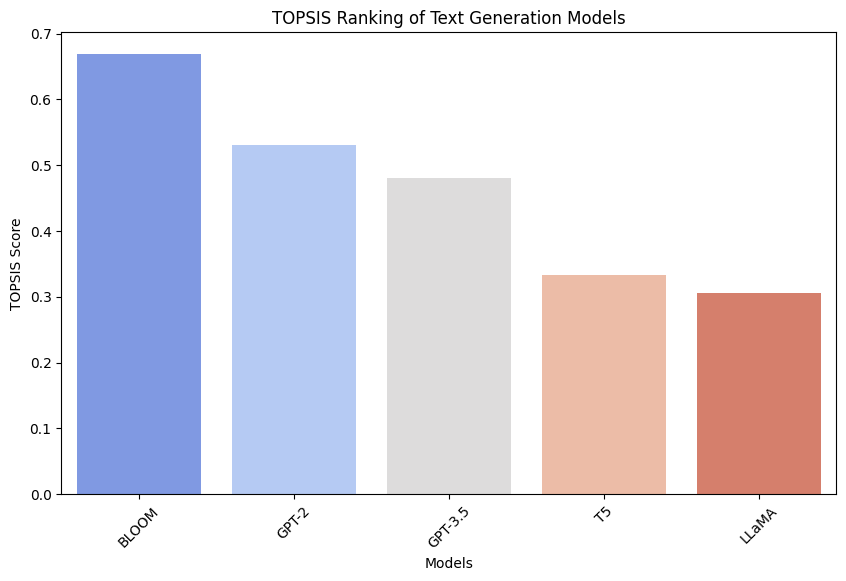

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and criteria values
models = {
    "GPT-3.5": [15.3, 85, 92, 0.08, 175],  # Perplexity, BLEU, ROUGE, Inference Time, Model Size
    "GPT-2": [30.1, 50, 65, 0.12, 1.5],
    "T5": [20.5, 70, 80, 0.09, 11],
    "LLaMA": [18.7, 78, 85, 0.07, 13],
    "BLOOM": [25.2, 65, 72, 0.10, 176]
}

criteria = ["Perplexity", "BLEU", "ROUGE", "Inference Time", "Model Size"]
weights = [0.3, 0.2, 0.2, 0.2, 0.1]  # Importance of each criterion

# Convert to DataFrame
df = pd.DataFrame.from_dict(models, orient='index', columns=criteria)
print("Original Data:\n", df)

# Normalize data
df_norm = df / np.sqrt((df ** 2).sum(axis=0))

# Weighted normalized matrix
df_weighted = df_norm * weights

# Ideal best & worst solutions
ideal_best = df_weighted.max()
ideal_worst = df_weighted.min()

# Compute distances
dist_best = np.sqrt(((df_weighted - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((df_weighted - ideal_worst) ** 2).sum(axis=1))

# Calculate TOPSIS score
topsis_score = dist_worst / (dist_best + dist_worst)
df["TOPSIS Score"] = topsis_score

# Rank models
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)
df_sorted = df.sort_values(by="TOPSIS Score", ascending=False)
print("\nFinal Ranking:\n", df_sorted)

# Save results
df_sorted.to_csv("topsis_results.csv")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sorted.index, y=df_sorted["TOPSIS Score"], palette="coolwarm")
plt.title("TOPSIS Ranking of Text Generation Models")
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.xticks(rotation=45)
plt.savefig("topsis_ranking.png")
plt.show()
